In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from nltk import word_tokenize
from collections import Counter

%matplotlib inline

In [2]:
file = 'http://bit.ly/mc_clean_data_usc'

In [3]:
df = pd.read_csv(file)

In [4]:
df.head()

,rude,trim_text,review_len,sentiment_polarity,sentiment_objectivity
0,1,im not a huge mcds lover but ive been to bette...,50,-0.328571,0.828571
1,1,terrible customer service came in at pm and st...,80,-0.257143,0.521429
2,0,first they lost my order actually they gave it...,156,0.093750,0.529167
3,0,i see im not the only one giving star only bec...,22,0.000000,1.000000
4,1,well its mcdonalds so you know what the food i...,143,-0.009361,0.437175


In [5]:
review_count = df[['trim_text','rude']].groupby(['rude'], as_index =False).count()
review_count

,rude,trim_text
0,0,1022
1,1,503


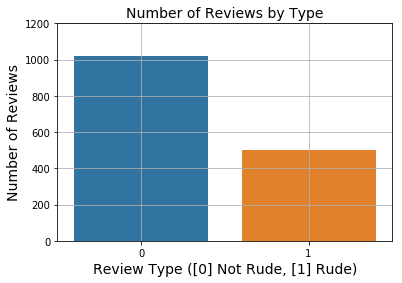

In [6]:
sns.barplot(review_count['rude'], review_count['trim_text'])
plt.grid(True)
plt.ylim(0, 1200, 250)
plt.xlabel('Review Type ([0] Not Rude, [1] Rude)', fontsize = 14)
plt.ylabel('Number of Reviews', fontsize = 14)
plt.title('Number of Reviews by Type', fontsize = 14)
plt.show()

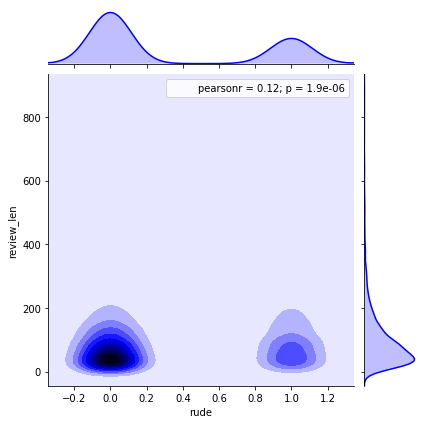

In [7]:
df_len = df[['rude', 'trim_text']].groupby(['trim_text'], as_index=False).mean()
plt.figure(figsize = (10, 10))
sns.jointplot(x=df["rude"], y=df["review_len"], kind='kde', color = 'b')
plt.show()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words='english', min_df=0.01, max_df=0.95)

In [9]:
X = df['trim_text']
y = df['rude']

X_dtm = vect.fit_transform(X)
pca = PCA(n_components = 2)
pca_results = pca.fit_transform(X_dtm.toarray())
print('Size of Feature Vector is: ', len(X_dtm.toarray()[0]))

Size of Feature Vector is:  691


In [10]:
pca.explained_variance_ratio_

array([ 0.01241489,  0.00998481])

In [11]:
print('Total Variance', (pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]) * 100, '%')

Total Variance 2.23997017599 %


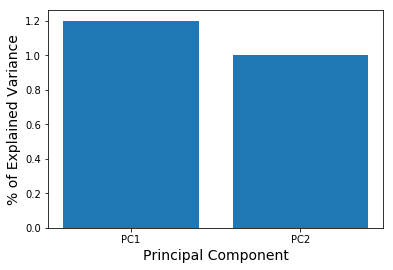

In [12]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x = range(1, len(per_var)+1), height=per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 14)
plt.ylabel('% of Explained Variance', fontsize = 14)
plt.show()

In [13]:
pca_df = pd.DataFrame(pca_results, columns=['x', 'y'])
pca_df['review_len'] = df['review_len']
pca_df['review'] = df['trim_text']
pca_df['rude'] = df['rude']

pca_df.head()

,x,y,review_len,review,rude
0,0.074933,0.118663,50,im not a huge mcds lover but ive been to bette...,1
1,0.011613,0.084241,80,terrible customer service came in at pm and st...,1
2,0.213562,-0.089458,156,first they lost my order actually they gave it...,0
3,-0.053461,-0.060213,22,i see im not the only one giving star only bec...,0
4,-0.058315,0.163793,143,well its mcdonalds so you know what the food i...,1


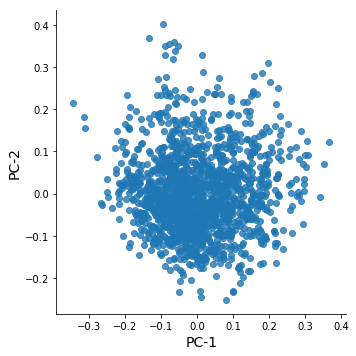

In [14]:
sns.lmplot( x="x", y="y", data=pca_df, fit_reg=False, legend=False)
plt.legend(loc='lower right')
plt.xlabel('PC-1', fontsize = 14)
plt.ylabel('PC-2', fontsize = 14)
plt.show()

In [15]:
from sklearn.decomposition import TruncatedSVD

X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(X_dtm)

In [16]:
model = TSNE(learning_rate=90, perplexity=70, n_components=2, verbose=2)
transformed = model.fit_transform(X_reduced)

[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 1525 samples in 0.002s...
[t-SNE] Computed neighbors for 1525 samples in 0.272s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1525
[t-SNE] Computed conditional probabilities for sample 1525 / 1525
[t-SNE] Mean sigma: 0.184859
[t-SNE] Computed conditional probabilities in 0.114s
[t-SNE] Iteration 50: error = 64.3777237, gradient norm = 0.1849756 (50 iterations in 3.798s)
[t-SNE] Iteration 100: error = 65.1735077, gradient norm = 0.1690608 (50 iterations in 3.766s)
[t-SNE] Iteration 150: error = 64.6682053, gradient norm = 0.2055737 (50 iterations in 3.820s)
[t-SNE] Iteration 200: error = 64.6512299, gradient norm = 0.1581570 (50 iterations in 3.790s)
[t-SNE] Iteration 250: error = 65.2013016, gradient norm = 0.1625944 (50 iterations in 3.798s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.201302
[t-SNE] Iteration 300: error = 2.0512919, gradient norm = 0.0035676 (50 iterations in 3.128s

In [17]:
tsne_df = pd.DataFrame(transformed, columns=['x', 'y'])
tsne_df['reveiw'] = df['trim_text']
tsne_df['rude'] = df['rude']
tsne_df.head()

,x,y,reveiw,rude
0,3.229091,-8.267091,im not a huge mcds lover but ive been to bette...,1
1,2.934895,0.561082,terrible customer service came in at pm and st...,1
2,4.699810,9.918188,first they lost my order actually they gave it...,0
3,-1.536750,0.408157,i see im not the only one giving star only bec...,0
4,2.046864,-3.974630,well its mcdonalds so you know what the food i...,1


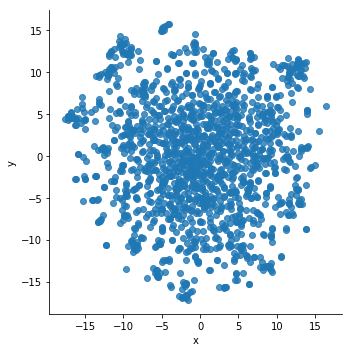

In [18]:
plt.figure(figsize=(20,10))
sns.lmplot( x="x", y="y", data=tsne_df, fit_reg=False, legend=False)
plt.legend(loc='lower right')
plt.show()

In [19]:
metric_ = []
silhouette_avg_ = []
for i in range(2, 25):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_dtm)
    metric_.append(kmeans.inertia_)
    labels = kmeans.predict(X_dtm)
    silhouette_avg = silhouette_score(X_dtm, labels)
    silhouette_avg_.append(silhouette_avg)

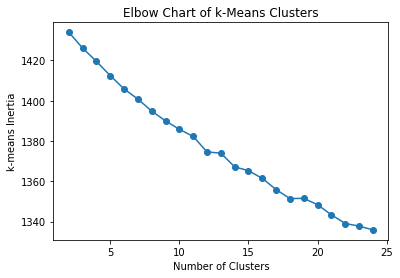

In [20]:
cluster = [x for x in range(2, 25)]
plt.scatter(cluster, metric_)
plt.plot(cluster, metric_)
plt.ylabel('k-means Inertia')
plt.xlabel('Number of Clusters')
plt.title('Elbow Chart of k-Means Clusters')
plt.show()

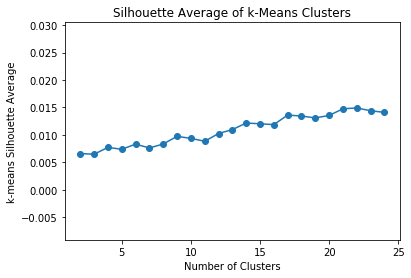

In [21]:
cluster = [x for x in range(2, 25)]
plt.scatter(cluster, silhouette_avg_)
plt.plot(cluster, silhouette_avg_)
plt.ylabel('k-means Silhouette Average')
plt.xlabel('Number of Clusters')
plt.title('Silhouette Average of k-Means Clusters')
plt.show()

In [22]:
X_dtm = vect.fit_transform(X)
kmeans = KMeans(n_clusters=15, random_state=10)
kmeans.fit(X_dtm)
labels = kmeans.predict(X_dtm)
labels

array([ 8,  4,  4, ..., 13, 11, 11], dtype=int32)

In [23]:
kmeans_df = pd.DataFrame()
kmeans_df['review'] = df['trim_text']
kmeans_df['rude'] = df['rude']
kmeans_df['Cluster'] = labels
kmeans_df.head(10)

,review,rude,Cluster
0,im not a huge mcds lover but ive been to bette...,1,8
1,terrible customer service came in at pm and st...,1,4
2,first they lost my order actually they gave it...,0,4
3,i see im not the only one giving star only bec...,0,11
4,well its mcdonalds so you know what the food i...,1,3
5,this has to be one of the worst and slowest mc...,0,10
6,im not crazy about this mcdonalds î¾this is pr...,0,3
7,one star and im beng kind i blame management l...,1,2
8,never been upset about any fast food drive thr...,1,8
9,this mcdonalds has gotten much better usually ...,0,1


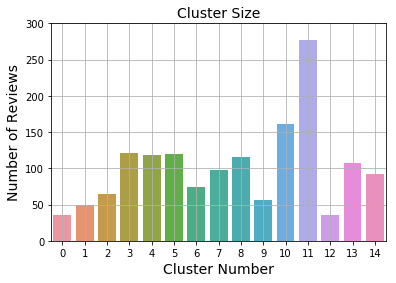

In [24]:
cluster_df = kmeans_df[['Cluster', 'review']].groupby(['Cluster'], as_index=False).count()
sns.barplot(cluster_df['Cluster'], cluster_df['review'])
plt.grid(True)
plt.ylim(0, 300, 100)
plt.xlabel('Cluster Number', fontsize = 14)
plt.ylabel('Number of Reviews', fontsize = 14)
plt.title('Cluster Size', fontsize = 14)
plt.show()

In [25]:
model = TSNE(learning_rate=200, perplexity=50)
transformed = model.fit_transform(X_dtm.toarray())

In [26]:
tsne_df = pd.DataFrame(transformed, columns=['x', 'y'])
tsne_df['Cluster'] = kmeans_df['Cluster']
tsne_df['trim_text'] = df['trim_text']

In [27]:
tsne_df.head()

,x,y,Cluster,trim_text
0,10.192237,-74.638428,8,im not a huge mcds lover but ive been to bette...
1,-11.104189,-36.864040,4,terrible customer service came in at pm and st...
2,9.679277,-32.881321,4,first they lost my order actually they gave it...
3,-3.432104,29.209957,11,i see im not the only one giving star only bec...
4,-0.812622,11.436987,3,well its mcdonalds so you know what the food i...


In [28]:
tsne_df[tsne_df['Cluster'] == 11].iloc[17]['trim_text']

'this mcdonalds is located right next to the building which houses studio movie grill ts super convenient to stop by and grab a quick bite before watching a movie if you dont want to spend a lot of money for food at the theater î¾but thats pretty much where the pros of this location stopive been to this mcdonalds several times but ive been a bit disappointed on several occasions î¾most recently i went through the drivethru and got a simple order a mcchicken sandwich and small fries drove to the studio movie grill parking lot to eat before a movie and noticed that my fries were cold î¾ughhhhh î¾cold mcdonalds fries are the worst î¾lamethe employees seem to be pretty friendly and the restaurant looks decent inside unfortunately they lack power outlets i saw one but maybe theres a one or two more scattered throughout the restaurant î¾this makes it inconvenient for people who like to stop by mcdonalds to use their laptops which i do quite oftenoverall this mcdonalds deserves about stars be

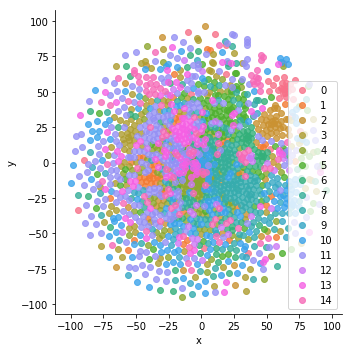

In [29]:
plt.figure(figsize=(20,10))
sns.lmplot( x="x", y="y", data=tsne_df, fit_reg=False, hue='Cluster', legend=False)
plt.legend(loc='lower right')
plt.show()